# Taller de Física Computacional

Carlos Ruestes / Cristián Sánchez - Taller de Física Computacional - FCEN - UNCUYO

# Sesión 11: Optimización

Podemos definir un *problema de optimización* como el problema de encontrar el "mejor" elemento dentro de un posible conjunto (o dominio) en base a un criterio de cual elemento es mejor que otro. Un ejemplo muy común en muchas disciplinas es el encontrar los parámetros de una función que mejor "ajustan" un resultado experimental. 

Para ser más estrictos, dada una función $f(x,\{p_i\})$ donde $x \in \mathbb R$ y $\{p_i\}$ es un conjunto de parámetros, dada una muestra que consiste en un conjunto de $N$ pares ordenados $(x_j,y_j)$. El "mejor" conjunto de parámetros $\{p_i\}_{\mathrm{best}}$ es aquel que minimiza la función

$$ E(\{p_i\}) = \frac{1}{N} \sum_{j=1}^N (f(x_j,\{p_i\})-y_j)^2. $$

Este problema de optimización en particular se conoce como *problema de mínimos cuadrados* porque optimiza el conjunto de parámetros para minimizar la desviación cuadrática media de la función $f$ sobre el espacio de parámetros posibles. El caso más simple que se puede plantear es el "ajuste de una recta" a un conjunto de puntos.

En este *notebook* se utilizan rutinas de optimización del paquete *SciPy* para encontrar el mejor polinomio de grado tres que ajusta un conjunto de datos.

Como siempre, cargamos los paquetes que utilizaremos

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

Nuestra función $f(x,\{p_i\})$ será un polinomio de grado tres que definimos de la forma $f(x)=a(x-x_1)(x-x_2)(x-x_3)$, pasamos los parámetros $(a,x_1,x_2,x_3)$ en un vector `p`:

In [19]:
def mif(x,p):
    x_1 = p[0]
    x_2 = p[1]
    x_3 = p[2]
    a = p[3]
    return a*(x-x_1)*(x-x_2)*(x-x_3)

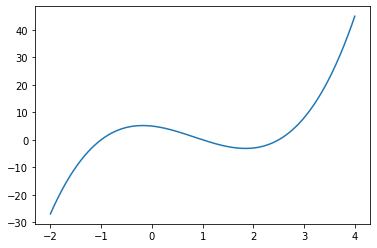

In [20]:
plt.plot(np.linspace(-2,4,1000),mif(np.linspace(-2,4,1000),[-1.0,1.0,2.5,2.0]))

En vez de utilizar un conjunto de datos "experimentales" vamos a generarlo de forma aleatoria. Para ello utilizaremos algunas funciones del generador de números aleatorios incluido en el paquete *NumPy*.  Estrictamente `Python` siempre devolverá una secuencia de números *pseudoaleatorios*. El generador es estrictamente determinista. Los números pseudoaleatorios son utilizados en muchos campos de la física computacional y la estadística y conviene estar mínimamente familiarizados con su uso. Lo primero que hacemos es "sembrar" el generador, de esta forma, cada vez que se llamen rutinas de generación de números aleatorios obtendremos una secuencia diferente. Para hacer que la secuencia sea siempre la misma podemos pasar un valor como parámetro a la rutina de la forma `np.random.seed(1234)`.

In [21]:
np.random.seed()

En la siguiente celda generamos el conjunto de $N$ pares ordenados $(x_j,y_j)$. La forma en que los generamos es:

- Primero muestremos en forma aleatoria el intervalo $[x_{\mathrm lb},x_{\mathrm ub})$ generando $N$ números aleatorios con una distribución uniforme en el intervalo $[0,1)$ y los escaleamos multiplicando por $(x_{\mathrm ub}-x_{\mathrm lb})$ y los "corremos" sumando $x_{\mathrm lb}$.
- Luego evaluamos $f(x_j,\mathbf{p})$ y sumamos a ese resultado un número aleatorio obtenido de una distribución Gaussiana de $\sigma = 1$ y multiplicado por el valor deeseado de $\sigma$.

De esta forma generamos un conjunto de pares ordenados uniformemente en las abscisa y para cada ordenada agregamos un "ruido" Gaussiano. 

Esta es una de muchas formas de obtener una distribución de prueba para "jugar" con nuestro problema de optimización.

In [22]:
N = 1000
x_ub = 4
x_lb = -2
sigma = 5.0
p = np.array([-1.0,1.0,2.5,2.0])

x_data = np.random.rand((N)) * (x_ub - x_lb) + x_lb
y_data = np.zeros_like(x_data)

for j in range(0,1000):
    y_data[j] = mif(x_data[j],p) + np.random.standard_normal() * sigma

Aquí dibujamos la función y nuestra muestra de evaluaciones:

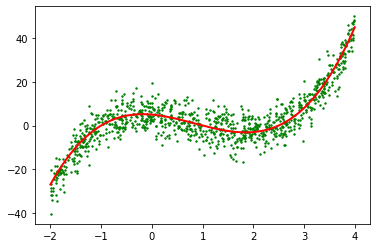

In [23]:
plt.scatter(x_data,y_data,marker='o',s=2.0,color='green')
plt.plot(np.linspace(x_lb,x_ub,1000),mif(np.linspace(x_lb,x_ub,1000),[-1.0,1.0,2.5,2.0]),color='red',linewidth='2.0')

Aquí definimos nuestra **función objetivo** como la media de las desviaciones cuadráticas para cada punto de la muestra:

In [24]:
def objective(params):
    objective = 0.0
    for i in range(0,N):
        objective += (mif(x_data[i],params) - y_data[i])**2
    return objective

Aquí llamamos la rutina `optimize` para encontrar un vector $\mathbf{p}$ que minimice $E(\mathbf{p})$. Así como hiicimos para la integración de ecuaciones diferenciales, pasamos a la función como parámetros:

- nuestra función objetivo `objective`.
- un vector inicial de prueba a partir del cual se comenzará la optimización `params0`
- un método a utilizar, en este caso el algoritmo *SIMPLEX* o de *Nelder-Mead* (para ver una lista completa de los métodos disponibles consultar la [documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)
- la tolerancia `tol`. Esta tolerancia será el criterio de finalización del optimizador, cuando una iteración cause un cambio en la función objetivo menor o igual a `tol` parará.
- por último pasamos una estructura de datos que no hemos visto nunca hasta ahora llamada **diccionario** conteniendo una serie de parámetros que son específicos para cada método de optimización, en este caso un número máximo de iteraciones y el booleano `disp` que escribe al finalizar una serie de datos sobree el proceso

In [26]:
params0 = np.array([0.0,0.0,0.0,0.5])
res = opt.minimize(objective, params0, method='nelder-mead', tol=1e-9
                   ,options={'disp': True, 'maxiter' : 4000})

Optimization terminated successfully.
         Current function value: 24368.082658
         Iterations: 447
         Function evaluations: 782


El resultado final de la optimización se encuentra en el vector `x` que es una propiedad del objeto almacenado en `res`:

In [27]:
res.x

array([-0.94795757,  1.03953181,  2.48601201,  1.99789449])

Podemos observar también el valor de la función objetivo en el conjunto de parámetros iniciales, en el final y en los que utilizamos para generar la muestra:

In [28]:
print('Valor inicial = ',objective(params0))
print('Valor final = ',objective(res.x))
print('Valor con nuestra función = ',objective(np.array([-1.0,2.5,1.0,2.0])))

Valor inicial =  70621.08125907433
Valor final =  24368.082657953863
Valor con nuestra función =  24673.85123740643


**Preguntas:**:

- ¿Encontró la rutina el mínimo de la función objetivo?
- ¿Porqué los valores encontrados para los parámetros no son los mismos que los que utilizamos para generar la muestra?
- ¿La función objetivo tiene un único mínimo?

Para ayudar a responder podemos empezar desdee otro lugar distinto:

In [11]:
params0 = np.array([-0.9,2.3,1.2,2.5])
res = opt.minimize(objective, params0, method='nelder-mead', tol=1e-9
                   ,options={'disp': True, 'maxiter' : 4*1000})

Optimization terminated successfully.
         Current function value: 23485.935470
         Iterations: 181
         Function evaluations: 338


In [12]:
print('Valor inicial = ',objective(params0))
print('Valor final = ',objective(res.x))
print('Valor con nuestra función = ',objective(np.array([-1.0,2.5,1.0,2.0])))

Valor inicial =  43149.70777479721
Valor final =  23485.935469719527
Valor con nuestra función =  23576.965631616455


¿Este resultado modifica sus respuestas anteriores?

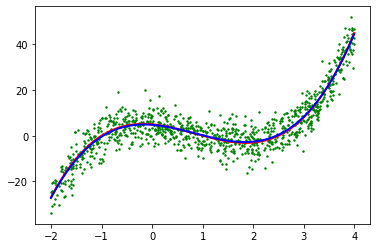

In [13]:
xs = np.linspace(x_lb,x_ub,1000)
plt.plot(xs,mif(xs,[-1.0,2.5,1.0,2.0]),color='red',linewidth='2.0')
plt.plot(xs,mif(xs,res.x),color='blue',linewidth='2.0')
plt.scatter(x_data,y_data,marker='o',s=2.0,color='green')

Utilicemos un método de optimización distinto:

In [14]:
params0 = np.array([-0.9,2.3,1.2,2.5])
res = opt.minimize(objective, params0, method='BFGS', tol=1e-9
                   ,options={'disp': True, 'maxiter' : 4*1000})

         Current function value: 23485.935470
         Iterations: 18
         Function evaluations: 367
         Gradient evaluations: 61


In [15]:
res.x

array([-0.96829627,  2.46124274,  1.02513444,  1.95884205])

In [16]:
print('Valor inicial = ',objective(params0))
print('Valor final = ',objective(res.x))
print('Valor con nuestra función = ',objective(np.array([-1.0,2.5,1.0,2.0])))

Valor inicial =  43149.70777479721
Valor final =  23485.93546971964
Valor con nuestra función =  23576.965631616455


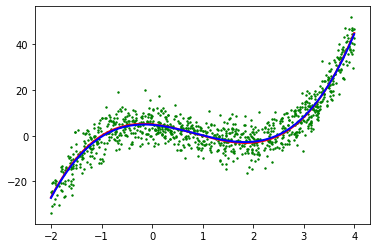

In [17]:
xs = np.linspace(x_lb,x_ub,1000)
plt.plot(xs,mif(xs,[-1.0,2.5,1.0,2.0]),color='red',linewidth='2.0')
plt.plot(xs,mif(xs,res.x),color='blue',linewidth='2.0')
plt.scatter(x_data,y_data,marker='o',s=2.0,color='green')

**Preguntas**:

- ¿Cuál método es *mejor*?
- ¿Por qué?

Notar que el método `BFGS` o Broyden-Fletcher-Goldfarb-Shanno requiere del gradiente de la función objetivo respecto a los parámetros para funcionar. En nuestro caso, al no proveer una rutina para el gradiente, la rutina lo estima utilizando una aproximación de diferencias finitas como las que utilizamos en sesiones anteriores.

**Ejercicio**

En un nuevo notebook utilize la rutina `optim` para encontrar el mínimo global de la [función de Rosenbrock](http://mathworld.wolfram.com/RosenbrockFunction.html)